In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [3]:
customer_usage = pd.read_csv('/workspaces/task_mobile/src/insights/CSV_files/Customer_Usage_Last_12_Months.csv')
mobile_plans = pd.read_csv('/workspaces/task_mobile/src/insights/CSV_files/Mobile_Plans_Test_Data.csv')

customer_usage['Month'] = pd.to_datetime(customer_usage['Month'])

print("Missing values in customer usage:")
print(customer_usage.isnull().sum())
print("\nMissing values in mobile plans:")
print(mobile_plans.isnull().sum())

print("\nCustomer Usage Data Head:")
display(customer_usage.sample(n=6))
print("\nMobile Plans Data:")
display(mobile_plans)

Missing values in customer usage:
CustomerID                 0
Month                      0
Monthly Data Usage (GB)    0
Monthly Minutes Usage      0
Monthly SMS Usage          0
dtype: int64

Missing values in mobile plans:
Provider                      0
Plan Name                     0
Monthly Cost ($)              0
Data Limit (GB)               0
Minutes Limit                 0
SMS Limit                     0
Data Overcharge ($/GB)        0
Minutes Overcharge ($/min)    0
SMS Overcharge ($/SMS)        0
dtype: int64

Customer Usage Data Head:


,CustomerID,Month,Monthly Data Usage (GB),Monthly Minutes Usage,Monthly SMS Usage
46,C004,2024-09-01,20.9,669,308
35,C003,2024-10-01,0.0,124,0
58,C005,2024-09-01,6.2,87,87
33,C003,2024-08-01,0.0,55,13
59,C005,2024-10-01,5.4,233,106
34,C003,2024-09-01,3.1,31,32



Mobile Plans Data:


,Provider,Plan Name,Monthly Cost ($),Data Limit (GB),Minutes Limit,SMS Limit,Data Overcharge ($/GB),Minutes Overcharge ($/min),SMS Overcharge ($/SMS)
0,ProviderA,Basic,20,5,100,100,5,0.10,0.05
1,ProviderA,Premium,50,20,500,500,2,0.05,0.02
2,ProviderB,Standard,30,10,300,200,3,0.08,0.04
3,ProviderB,Unlimited,70,50,1000,1000,1,0.02,0.01
4,ProviderC,Economy,15,3,50,50,7,0.15,0.10
5,ProviderC,Pro,40,15,400,300,3,0.07,0.03


In [4]:
usage_summary = customer_usage.groupby('CustomerID').agg({
    'Monthly Data Usage (GB)': ['mean', 'median', 'min', 'max','std'],
    'Monthly Minutes Usage': ['mean', 'median', 'min', 'max','std'],
    'Monthly SMS Usage': ['mean', 'median', 'min', 'max','std']
}).round(2)

print("Usage Summary:mean, median, min, max and std")
display(usage_summary)

Usage Summary:mean, median, min, max and std


Monthly Data Usage (GB)                            \
                              mean median   min   max    std   
CustomerID                                                     
C001                          5.21   5.35   1.5   8.7   2.19   
C002                         13.70  10.10   5.6  60.6  14.91   
C003                          1.92   1.80   0.0   5.6   1.75   
C004                         23.43  20.80  17.0  52.4   9.40   
C005                          7.61   7.65   4.9  11.9   1.92   

           Monthly Minutes Usage                           Monthly SMS Usage  \
                            mean median  min   max     std              mean   
CustomerID                                                                     
C001                       74.50   74.0    0   123   34.09             59.00   
C002                      397.17  411.5  290   513   65.91            198.33   
C003                       45.17   43.0    0   124   37.13             17.33   
C004                      753.92  725.0  589  1295  176.76            296.58   
C005                      131.83  138.5   34   233   56.27             83.67   

                                    
           median  min  max    std  
CustomerID                          
C001         60.0   24   99  21.91  
C002        196.0  172  230  19.55  
C003         13.0    0   52  17.01  
C004        294.0  270  322  17.35  
C005         85.5   33  121  23.04

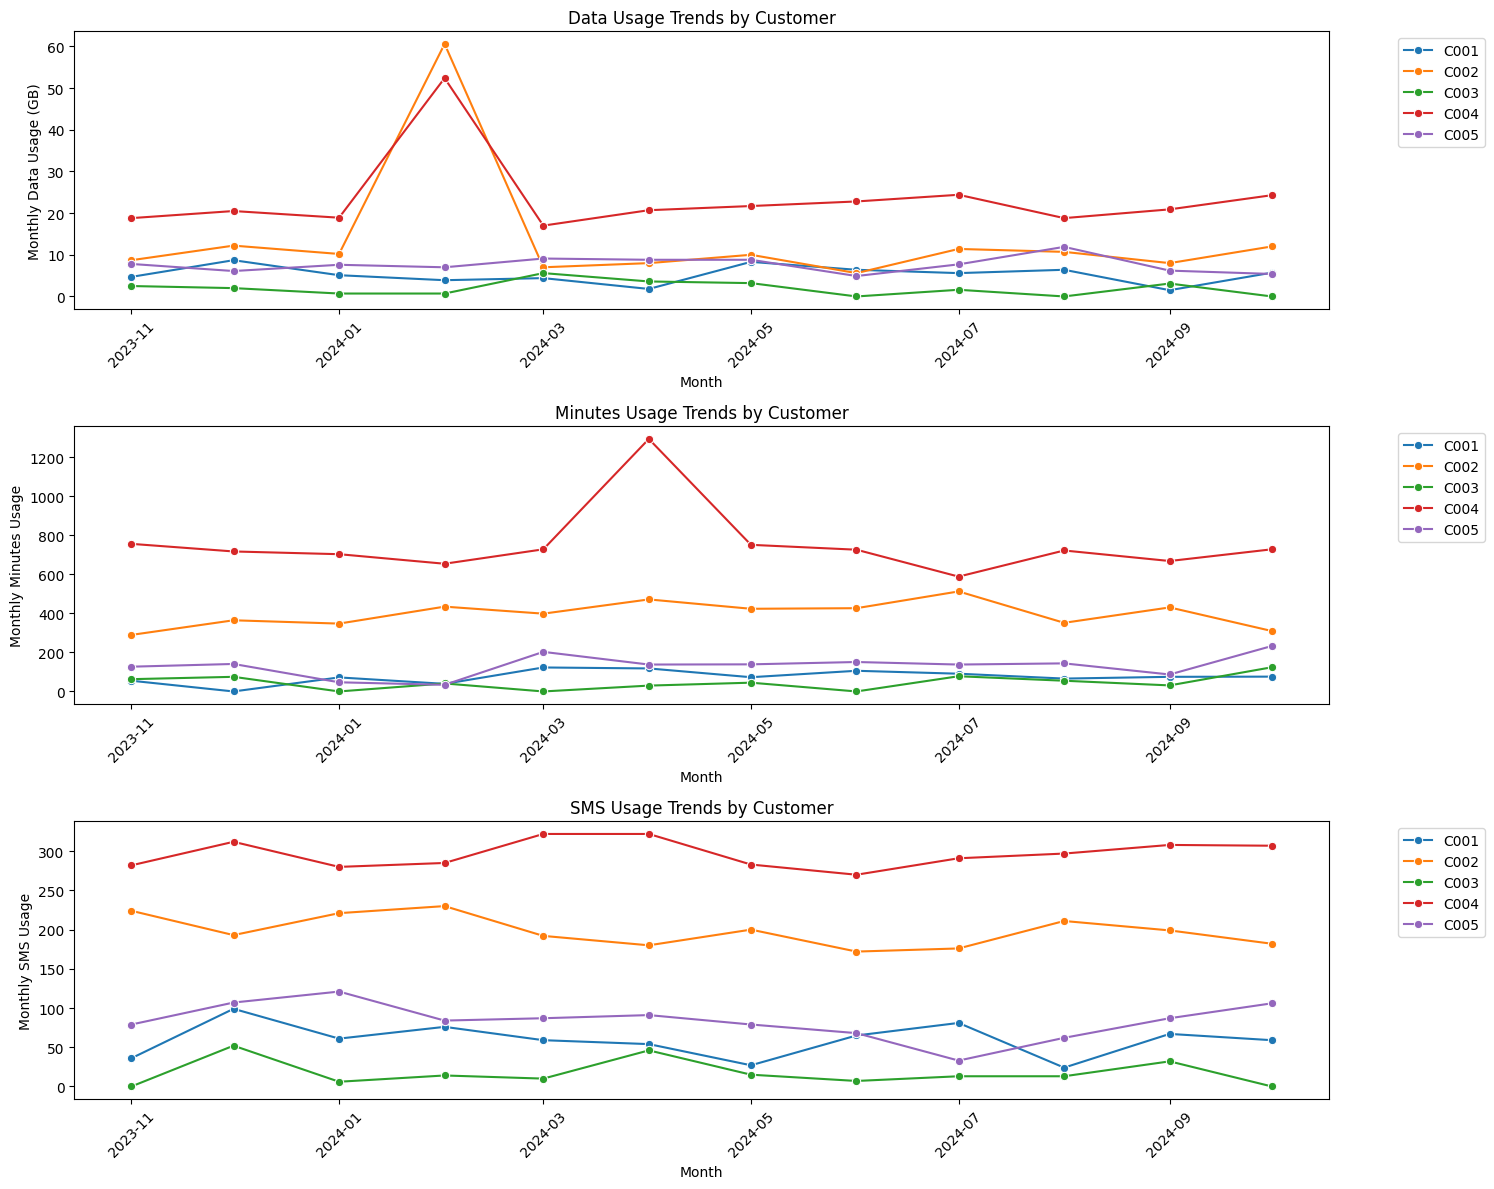

In [5]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
sns.lineplot(data=customer_usage, x='Month', y='Monthly Data Usage (GB)', 
             hue='CustomerID', marker='o')
plt.title('Data Usage Trends by Customer')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(3, 1, 2)
sns.lineplot(data=customer_usage, x='Month', y='Monthly Minutes Usage', 
             hue='CustomerID', marker='o')
plt.title('Minutes Usage Trends by Customer')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(3, 1, 3)
sns.lineplot(data=customer_usage, x='Month', y='Monthly SMS Usage', 
             hue='CustomerID', marker='o')
plt.title('SMS Usage Trends by Customer')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

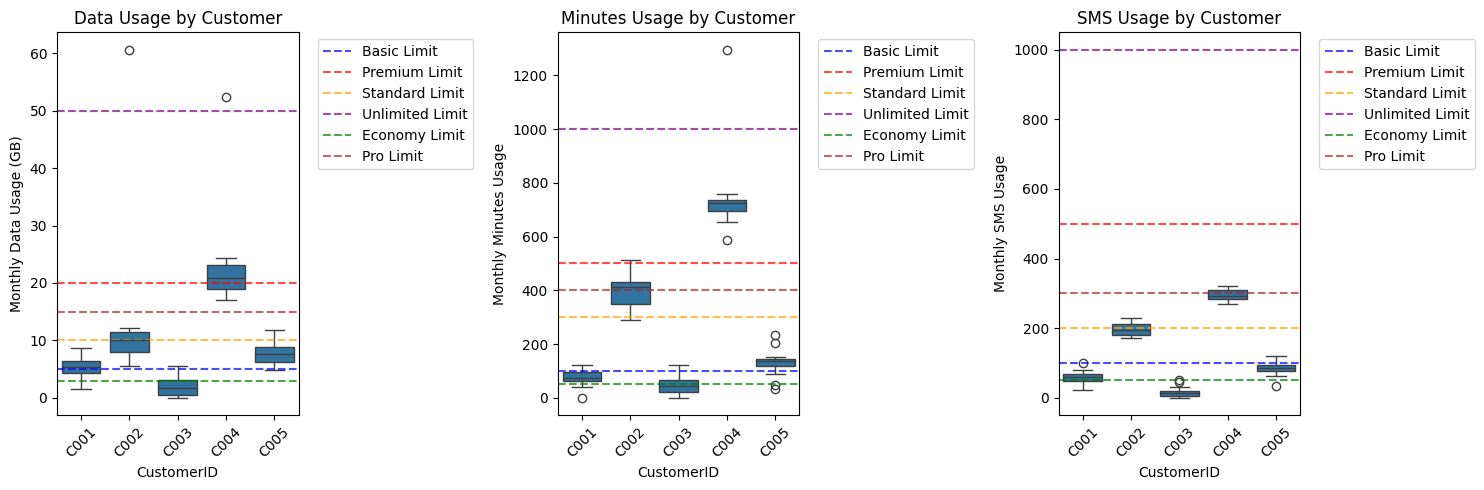

In [6]:
plt.figure(figsize=(15, 5))

plan_colors = {
    'Economy': 'green',
    'Basic': 'blue',
    'Standard': 'orange',
    'Premium': 'red',
    'Unlimited': 'purple',
    'Pro': 'brown'  
}

plt.subplot(1, 3, 1)
sns.boxplot(x='CustomerID', y='Monthly Data Usage (GB)', data=customer_usage)
plt.title('Data Usage by Customer')
plt.xticks(rotation=45)
for _, plan in mobile_plans.iterrows():
    plt.axhline(y=plan['Data Limit (GB)'], linestyle='--', 
                color=plan_colors[plan['Plan Name']],
                label=f"{plan['Plan Name']} Limit", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 3, 2)
sns.boxplot(x='CustomerID', y='Monthly Minutes Usage', data=customer_usage)
plt.title('Minutes Usage by Customer')
plt.xticks(rotation=45)
for _, plan in mobile_plans.iterrows():
    plt.axhline(y=plan['Minutes Limit'], linestyle='--', 
                color=plan_colors[plan['Plan Name']],
                label=f"{plan['Plan Name']} Limit", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 3, 3)
sns.boxplot(x='CustomerID', y='Monthly SMS Usage', data=customer_usage)
plt.title('SMS Usage by Customer')
plt.xticks(rotation=45)
for _, plan in mobile_plans.iterrows():
    plt.axhline(y=plan['SMS Limit'], linestyle='--', 
                color=plan_colors[plan['Plan Name']],
                label=f"{plan['Plan Name']} Limit", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()